In [1]:
import numpy as np
from scipy.linalg import norm
from scipy.spatial.distance import cdist
import sys
sys.path.append('/home/hooshmand/Documents/Git/myenv/lib/python3.11/site-packages')
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from seaborn import scatterplot as scatter

In [2]:
class FCM:

    def __init__(self, n_clusters=10, max_iter=100, m=2, error=1e-5, random_state=42):
        self.u, self.centers = None, None
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.m = m
        self.error = error
        self.random_state = random_state
        self.n_samples = 0

    def fit(self, X):

        self.n_samples = X.shape[0]
        r = np.random.RandomState(self.random_state)
        u = r.rand(self.n_samples, self.n_clusters)
        u = u / np.tile(u.sum(axis=1)[np.newaxis].T, self.n_clusters)
        self.u = u

        for iteration in range(self.max_iter):
            u_old = self.u.copy()

            self.centers = self.next_centers(X)
            self.u = self.predict(X)

            if norm(self.u - u_old) < self.error:
                break
                
        return self

    def next_centers(self, X):
        um = self.u ** self.m
        return (X.T @ um / np.sum(um, axis=0)).T

    def predict(self, X):
        power = float(2 / (self.m - 1))
        temp = cdist(X, self.centers) ** power
        denominator_ = temp.reshape((X.shape[0], 1, -1)).repeat(temp.shape[-1], axis=1)
        denominator_ = temp[:, :, np.newaxis] / denominator_

        return 1 / denominator_.sum(2)


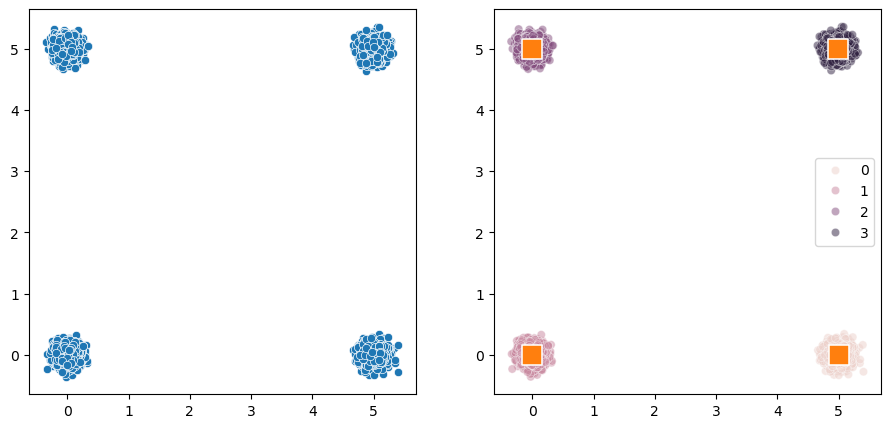

In [3]:
if __name__ == "__main__":
    n_samples = 10000
    n_bins = 4
    centers = [(0, 5), (0, 0), (5, 5), (5, 0)]

    X, _ = make_blobs(n_samples=n_samples, n_features=2, cluster_std=0.1, centers=centers)
    fcm = FCM(n_clusters=4)
    fcm.fit(X)
    fcm_centers = fcm.centers
    fcm_labels = fcm.u.argmax(axis=1)
    f, axes = plt.subplots(1, 2, figsize=(11, 5))
    scatter(x=X[:, 0], y=X[:, 1], ax=axes[0])
    scatter(x=X[:, 0], y=X[:, 1], ax=axes[1], hue=fcm_labels, alpha=0.5)
    scatter(x=fcm_centers[:, 0], y=fcm_centers[:, 1], ax=axes[1], marker="s", s=200)
    plt.show()

